In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

$$
C_x=C_0\frac{v_i}{v_{t(p-p)}}2\sqrt{2}
$$

In [2]:
vr_lis=[0,0.2,0.4,0.6,0.8,1,3,5,7,9]
C_0=5000
marker_lis=['.','^','*','x','+']

data_vi=pd.read_csv('test_data.csv')
data_Cx=pd.DataFrame(columns=data_vi.columns)
for col in data_vi.columns[:2]:
    data_Cx[col]=data_vi[col]
for col in data_vi.columns[2:]:
    data_Cx[col]=C_0*data_vi[col]/data_vi['vt']*2*2**0.5
print(data_Cx.to_markdown())

|    |   f |   vt |    vr_0 |   vr_0.2 |   vr_0.4 |   vr_0.6 |   vr_0.8 |    vr_1 |    vr_3 |    vr_5 |    vr_7 |    vr_9 |
|---:|----:|-----:|--------:|---------:|---------:|---------:|---------:|--------:|--------:|--------:|--------:|--------:|
|  0 |  30 |  100 | 10.2955 |  8.65499 |  8.31558 |  7.83474 |  7.50947 | 7.1842  | 5.62857 | 4.97803 | 4.65276 | 4.38406 |
|  1 |  30 |  150 | 10.55   |  9.05097 |  8.37214 |  7.9196  |  7.46705 | 7.16535 | 5.60029 | 5.07231 | 4.65748 | 4.2615  |
|  2 |  30 |  200 | 11.1794 |  9.4328  |  8.73277 |  8.26608 |  7.78525 | 7.46705 | 5.83363 | 5.16188 | 4.77297 | 4.51134 |
|  3 |  20 |  200 | 11.4339 |  9.62372 |  8.90955 |  8.42164 |  7.9196  | 7.59433 | 5.92555 | 5.23966 | 4.83661 | 4.56791 |
|  4 |  10 |  200 | 11.936  |  9.94899 |  9.18532 |  8.66206 |  8.15294 | 7.80646 | 6.08819 | 5.38108 | 4.94975 | 4.67398 |


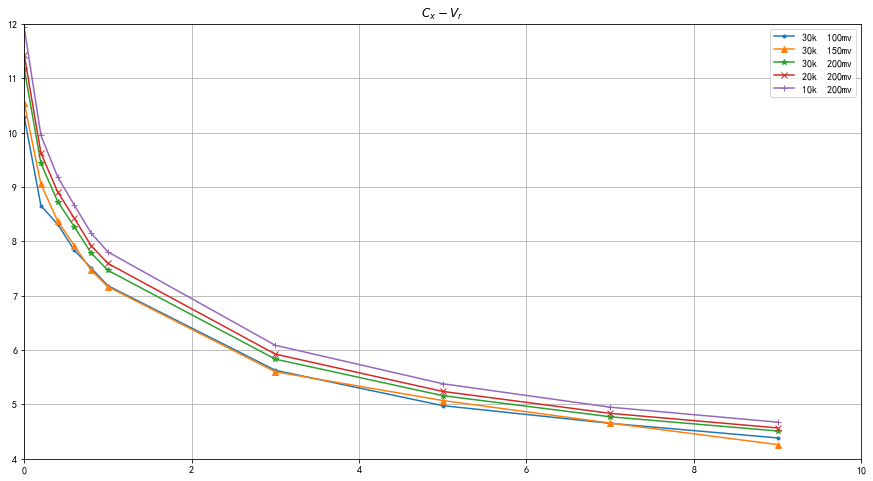

In [3]:
plt.figure(figsize=(15,8))
plt.grid()
plt.xlim(0,10)
plt.ylim(4,12)
plt.title('$C_x-V_r$')
for i in range(5):
    plt.plot(vr_lis,data_Cx.iloc[i].values[2:],marker=marker_lis[i],label='%ik  %imv'%(data_Cx['f'][i],data_Cx['vt'][i]))
plt.legend()
plt.show()

曲线大致与
$$
\frac{C_x}{A}=\left[\frac{q\varepsilon\varepsilon_0N_D}{2(V_D+V_r)}\right]^2
$$
相符，则由上公式得到
$$
C_x^{-2}=\frac{2(V_D+V_r)}{q\varepsilon\varepsilon_0N_DA^2}
$$
对其作***一元线性回归***，令  $y=bx+a\quad(y=C_x^{-2},x=V_r)$

In [4]:
data_Cx_2=pd.DataFrame(columns=data_Cx.columns)
for col in data_Cx.columns[:2]:
    data_Cx_2[col]=data_Cx[col]
for col in data_Cx.columns[2:]:
    data_Cx_2[col]=data_Cx[col]**-2
print(data_Cx_2.to_markdown())

|    |   f |   vt |       vr_0 |    vr_0.2 |    vr_0.4 |    vr_0.6 |    vr_0.8 |      vr_1 |      vr_3 |      vr_5 |      vr_7 |      vr_9 |
|---:|----:|-----:|-----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|
|  0 |  30 |  100 | 0.00943425 | 0.0133496 | 0.0144616 | 0.0162911 | 0.0177329 | 0.019375  | 0.0315649 | 0.0403538 | 0.0461932 | 0.0520291 |
|  1 |  30 |  150 | 0.00898447 | 0.012207  | 0.0142668 | 0.0159439 | 0.017935  | 0.0194771 | 0.0318845 | 0.0388676 | 0.0460998 | 0.055065  |
|  2 |  30 |  200 | 0.00800141 | 0.0112388 | 0.0131128 | 0.0146353 | 0.0164989 | 0.017935  | 0.0293848 | 0.0375305 | 0.0438957 | 0.0491347 |
|  3 |  20 |  200 | 0.00764909 | 0.0107973 | 0.0125976 | 0.0140996 | 0.0159439 | 0.0173389 | 0.0284801 | 0.0364245 | 0.0427482 | 0.0479253 |
|  4 |  10 |  200 | 0.00701916 | 0.0101028 | 0.0118525 | 0.0133278 | 0.0150443 | 0.0164094 | 0.0269789 | 0.0345351 | 0.0408163 | 0.0457749 |


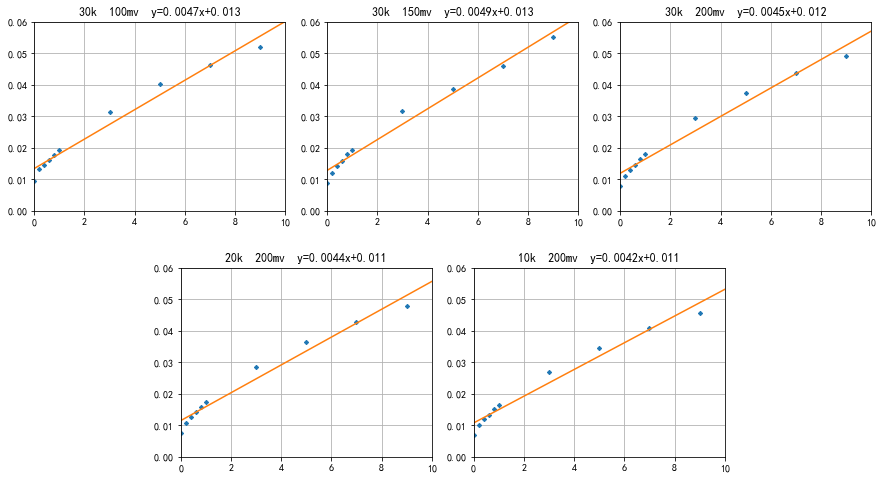

In [5]:
fit_lis=pd.DataFrame(columns=data_Cx_2.columns[:2])
for col in data_Cx_2.columns[:2]:
    fit_lis[col]=data_Cx_2[col]
plt.figure(figsize=(15,8))
grid = plt.GridSpec(2, 6, wspace=0.4, hspace=0.3)
for i in range(5):
    plt.subplot(grid[0 if i<=2 else 1,i*2 if i<=2 else (i-3)*2+1:i*2+2 if i<=2 else (i-3)*2+3])
    plt.xlim(0,10)
    plt.ylim(0,0.06)
    plt.grid()
    plt.plot(vr_lis,data_Cx_2.iloc[i][2:],linestyle='',marker='D',markersize=3)
    fit=np.polyfit(vr_lis,data_Cx_2.iloc[i][2:],1)
    fit_lis.loc[i,['b','a']]=fit[0],fit[1]
    x=np.linspace(0,10,100)
    y=np.polyval(fit,x)
    plt.title('%ik  %imv  y=%.2gx+%.2g'%(data_Cx_2['f'][i],data_Cx_2['vt'][i],fit[0],fit[1]))
    plt.plot(x,y)
plt.show()

In [6]:
print(fit_lis.to_markdown())

|    |   f |   vt |          b |         a |
|---:|----:|-----:|-----------:|----------:|
|  0 |  30 |  100 | 0.0046704  | 0.0134685 |
|  1 |  30 |  150 | 0.00488575 | 0.0128816 |
|  2 |  30 |  200 | 0.00451237 | 0.0119534 |
|  3 |  20 |  200 | 0.00441659 | 0.0114756 |
|  4 |  10 |  200 | 0.00423878 | 0.0107414 |


因为
$$
y=bx+a\quad(y=C_x^{-2},x=V_r)\\
\left.
\begin{array}{a}
a=\frac{2V_D}{q\varepsilon\varepsilon_0N_DA^2}\\
b=\frac{2}{q\varepsilon\varepsilon_0N_DA^2}
\end{array}
\right\}
\Rightarrow
\left\{
\begin{align}
N_D&=\frac{2}{bA^2q\varepsilon\varepsilon_0}\\
V_D&=\frac ab
\end{align}
\right.
$$
其中 $q=1.6\times10^{-19}c\qquad\varepsilon=11.8\qquad\varepsilon_0=8.854\times10^{-14}F/cm\qquad A\approx0.05^2\pi cm^2$

In [7]:
q=constants.electron_volt
print('q=',q)
epsilon=11.8
print('epsilon=',epsilon)
epsilon_0=constants.epsilon_0/100
print('epsilon_0=',epsilon_0)
A=0.05**2*constants.pi
print('A=',A)
res_lis=pd.DataFrame(columns=fit_lis.columns[:2])
for col in fit_lis.columns[:2]:
    res_lis[col]=fit_lis[col]
for i in range(5):
    res_lis.loc[i,'vd']=fit_lis.loc[i,'a']/fit_lis.loc[i,'b']
    res_lis.loc[i,'nd']=2/(fit_lis.loc[i,'b']*A**2*q*epsilon*epsilon_0)
print(res_lis.to_markdown())

q= 1.602176634e-19
epsilon= 11.8
epsilon_0= 8.854187812800001e-14
A= 0.007853981633974483
|    |   f |   vt |      vd |          nd |
|---:|----:|-----:|--------:|------------:|
|  0 |  30 |  100 | 2.8838  | 4.1472e+37  |
|  1 |  30 |  150 | 2.63657 | 3.96441e+37 |
|  2 |  30 |  200 | 2.64902 | 4.29244e+37 |
|  3 |  20 |  200 | 2.5983  | 4.38553e+37 |
|  4 |  10 |  200 | 2.53408 | 4.56949e+37 |


In [8]:
vd_avg=res_lis['vd'].mean()
nd_avg=res_lis['nd'].mean()
print('vd_avg=',vd_avg)
print('nd_avg=',nd_avg)

vd_avg= 2.66035383227723
nd_avg= 4.271813326252802e+37


$$
\begin{align}
\overline{V_d}&=2.66\\
\overline{N_d}&=4.27\times10^{37}
\end{align}
$$